# Titanic Survival Classification KNN vs ANN

## About this project: <a class="anchor" id="About this project"></a>
The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during its maiden voyage, the widely considered "unsinkable" RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, certain groups of people were more likely to survive than others.

In this challenge, participants are asked to build a predictive model that answers the question: “What sorts of people were more likely to survive?” using passenger data (e.g., name, age, gender, socio-economic class, etc.).


Participants should submit a CSV file with exactly 418 entries plus a header row. The submission will show an error if there are extra columns (beyond PassengerId and Survived) or rows. The file should have exactly two columns:

* PassengerId (sorted in any order)
* Survived (contains the binary predictions: 1 for survived, 0 for deceased)










## Goals: 

* The main objective is to predict if a passenger survived the sinking of the Titanic or not. For each passenger in the test set, participants must predict a 0 (did not survive) or 1 (survived) value for the Survived variable.

### Specific Goals

* Data Cleaning and Handling Missing Data: Clean and appropriately handle missing data in the dataset to ensure the accuracy and integrity of the predictive models.
        
* Pattern Identification: Identify patterns among numerical and categorical data to aid in the construction of effective models.
* Data Visualization: Visualize the data in a concise and relevant manner to uncover insights and trends.
* Model Construction: Build a comprehensive model using the K-Nearest Neighbors (KNN) algorithm.
        Construct an artificial neural network model to improve predictive accuracy.
* Model Evaluation: Evaluate the accuracy of each model to determine their effectiveness in predicting survival outcomes.

## About the Dataset: <a class="anchor" id="Data"></a>
The dataset for this challenge is divided into two groups:

Training set (train.csv)
Test set (test.csv)
The training set is used to build machine learning models. It includes the outcome (also known as the “ground truth”) for each passenger, which indicates whether they survived or not. The model will be trained using features such as passengers’ gender and class. Participants can also use feature engineering to create new features.

The test set is used to evaluate how well the model performs on unseen data. The ground truth for each passenger in the test set is not provided. Participants must predict whether each passenger in the test set survived the Titanic sinking using the trained model.

Additionally, the dataset includes a file named gender_submission.csv, which contains a set of predictions assuming all and only female passengers survived. This serves as an example of what a submission file should look like.

#### Data Dictionary

* survival: Survival (0 = No, 1 = Yes)
* pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* sex: Sex
* age: Age in years
* sibsp: Number of siblings/spouses aboard the Titanic
* parch: Number of parents/children aboard the Titanic
* ticket: Ticket number
* fare: Passenger fare
* cabin: Cabin number
* embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

#### Variable Notes

* pclass: A proxy for socio-economic status (SES):  

        1st = Upper  
        2nd = Middle  
        3rd = Lower  

     
* age: Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5.  

* sibsp: The dataset defines family relations as follows:

        Sibling = brother, sister, stepbrother, stepsister  
        Spouse = husband, wife (mistresses and fiancés were ignored)

    
* parch: The dataset defines family relations as follows:

        Parent = mother, father
        Child = daughter, son, stepdaughter, stepson
        Some children traveled only with a nanny, therefore parch=0 for them.



## Acknowledgement: <a class="anchor" id="Data"></a>
The dataset for the "Titanic - Machine Learning from Disaster" challenge is provided by Kaggle and was created by Will Cukierski in 2012. For more information, you can visit the competition page on Kaggle here: https://kaggle.com/competitions/titanic.

## Loading the Data
This section entails importing the dataset from a CSV file using the Pandas library. The necessary libraries will be imported, and the first 5 rows of the dataset will be visualized.


In [402]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import os
import re

In [403]:
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

input\gender_submission.csv
input\test.csv
input\train.csv


In [404]:
train_data = pd.read_csv("input/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [405]:
test_data = pd.read_csv("input/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Information


The training and test datasets exhibit distinct dimensions. The training set comprises 891 rows and 12 columns, while the test set consists of 418 rows and 11 columns. In the training dataset, missing values are observed in features such as age, cabin, and embarked port. Similarly, the test dataset has missing data in age, fare, and cabin. Statistical summaries unveil insights into the distribution of variables in both datasets, highlighting features like the average age of passengers and the mean fare paid.

#### Train Data

In [406]:
train_data.shape

(891, 12)

In [407]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [408]:
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [409]:
train_data.iloc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [410]:
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


#### Test Data

In [411]:
test_data.shape

(418, 11)

In [412]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [413]:
print(test_data.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [414]:
test_data.iloc[0]

PassengerId                 892
Pclass                        3
Name           Kelly, Mr. James
Sex                        male
Age                        34.5
SibSp                         0
Parch                         0
Ticket                   330911
Fare                     7.8292
Cabin                       NaN
Embarked                      Q
Name: 0, dtype: object

In [415]:
print(test_data.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


## Data Cleaning

In this section, the training and test data were cleaned. To achieve this, the distribution of data in the numerical variables was identified, and the frequencies in the categorical variables were determined. Additionally, the names were standardized and grouped into six categories. Based on this information, missing data in the 'Age' and 'Embarked' columns were filled in the training data, while missing data in the 'Age' and 'Fare' columns were filled in the test data.

#### Train Data

In [416]:
#Dropping columns that are not part of the analysis
# List of columns to drop
columns_to_drop = ['PassengerId', 'Cabin','Ticket']
# Drop the columns
train_data = train_data.drop(columns=columns_to_drop)

In [417]:
# see the duplicated rows
train_data.duplicated().sum()

0

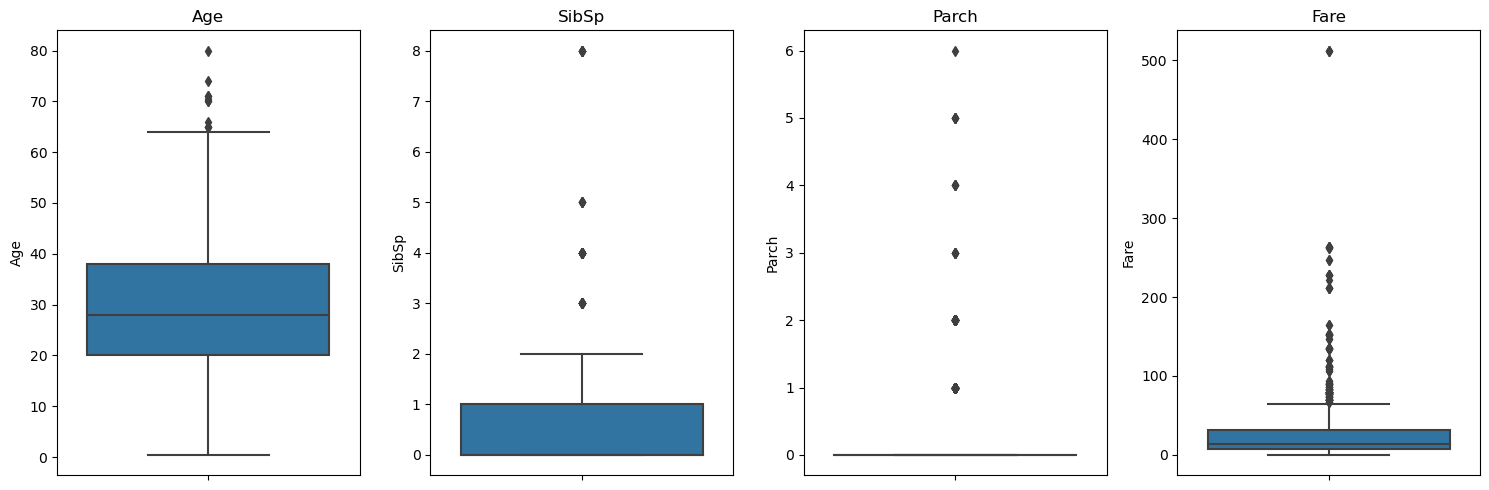

In [418]:
#Define Outliers in Numeric Variables
# Specify the columns you want to plot
columns_to_plot = ['Age', 'SibSp', 'Parch','Fare']

# Create subplots for the boxplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(15, 5))

# Iterate over the columns and plot the boxplots
for i, col in enumerate(columns_to_plot):
    sns.boxplot(y=train_data[col], ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

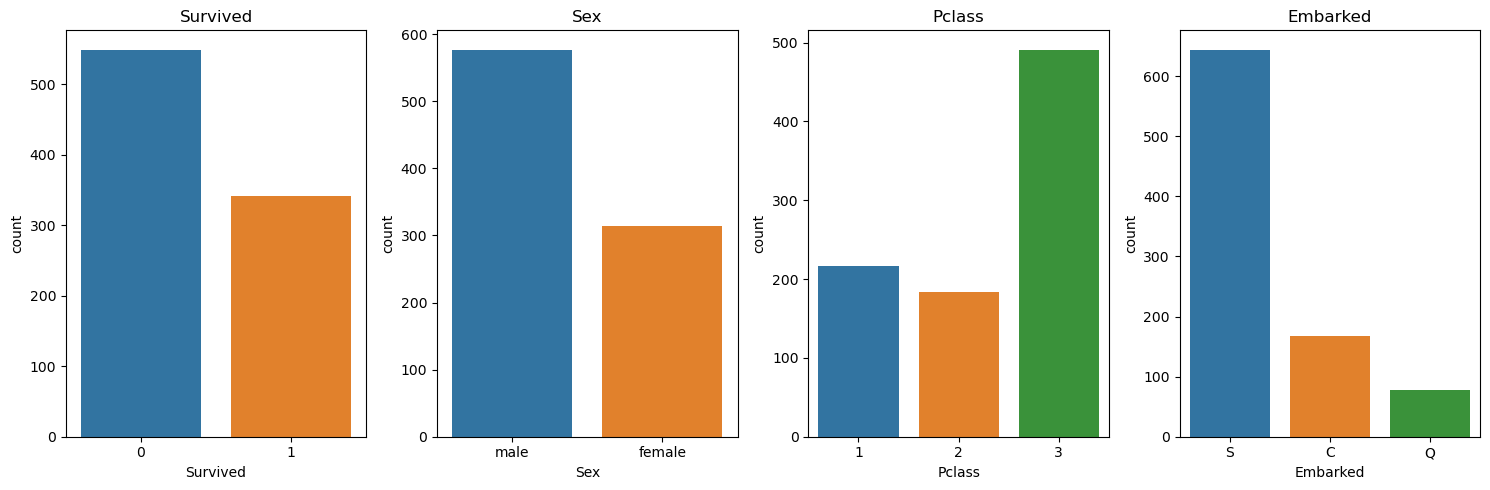

In [419]:
#Define Outliers in Cat Values
# Specify the columns you want to plot
columns_to_plot = ['Survived', 'Sex', 'Pclass', 'Embarked']

# Create subplots for the count plots
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(15, 5))

# Iterate over the columns and plot the count plots
for i, col in enumerate(columns_to_plot):
    sns.countplot(data=train_data, x=col, ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [420]:
#Cleaning Names
train_data.Name.head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [421]:
# Regex pattern to extract the title
pattern = r', (\w+)\.'

# Apply the regex pattern to the 'Name' column and extract the titles
train_data['Name'] = train_data['Name'].apply(lambda x: re.findall(pattern, x)[0] if re.findall(pattern, x) else ' ')

# Show the count of titles
title_count = train_data['Name'].value_counts()
print(title_count)

Name
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
              1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


In [422]:
# Grouping categories
# Define the categories
categories = {
    'Mr': 'Mr',#Adult male
    'Miss': 'Miss', #Young or unmarried female
    'Ms': 'Miss', #Young or unmarried female
    'Mrs': 'Mrs', #Married female
    'Mme': 'Mrs', #Married female
    'Master': 'Master',#Young boy
    'Dr':  'Dr' #Professional
}

# Function to assign the 'Others' category to unclassified titles
def categorize_title(title):
    if title in categories:
        return categories[title]
    else:
        return 'Especial' #Others

# Apply the function to the 'Name' column to create a new column 'TitleCategory'
train_data['Name'] = train_data['Name'].apply(lambda x: categorize_title(x))

# Show the count of each title category
print(train_data['Name'].value_counts())

Name
Mr          517
Miss        183
Mrs         126
Master       40
Especial     18
Dr            7
Name: count, dtype: int64


#####  Filling Values in Train Data

In [423]:
# Calculate the mean and median of the 'Age' column for each unique value in the 'Name' column
age_stats = train_data.groupby('Name')['Age'].agg(['mean', 'median'])

# Display the age statistics for each unique value in the 'Name' column
print(age_stats)

               mean  median
Name                       
Dr        42.000000    46.5
Especial  44.333333    46.5
Master     4.574167     3.5
Miss      21.816327    21.0
Mr        32.368090    30.0
Mrs       35.788991    35.0


In [424]:
#Calculate the median age for each title in the 'TitleCategory' column
median_age_by_title = train_data.groupby('Name')['Age'].median()

# Function to fill missing values in 'Age' with the median age corresponding to the title
def fill_age(row):
    if pd.isnull(row['Age']):
        return median_age_by_title[row['Name']]
    else:
        return row['Age']

# Fill missing values in 'Age' with the median age corresponding to the title
train_data['Age'] = train_data.apply(fill_age, axis=1)

In [425]:
# Calculate the mode of 'Embarked' for each title in the 'TitleCategory' column
mode_embarked_by_title = train_data.groupby('Name')['Embarked'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Function to fill missing values in 'Embarked' with the mode of 'Embarked' corresponding to the title
def fill_embarked(row):
    if pd.isnull(row['Embarked']):
        return mode_embarked_by_title[row['Name']]
    else:
        return row['Embarked']

# Fill missing values in 'Embarked' with the mode of 'Embarked' corresponding to the title
train_data['Embarked'] = train_data.apply(fill_embarked, axis=1)

In [426]:
print(train_data.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


#### Test Data

In [427]:
#Dropping columns that are not part of the analysis
# List of columns to drop
columns_to_drop = ['Cabin','Ticket']
# Drop the columns
test_data = test_data.drop(columns=columns_to_drop)

In [428]:
# see the duplicated rows
test_data.duplicated().sum()

0

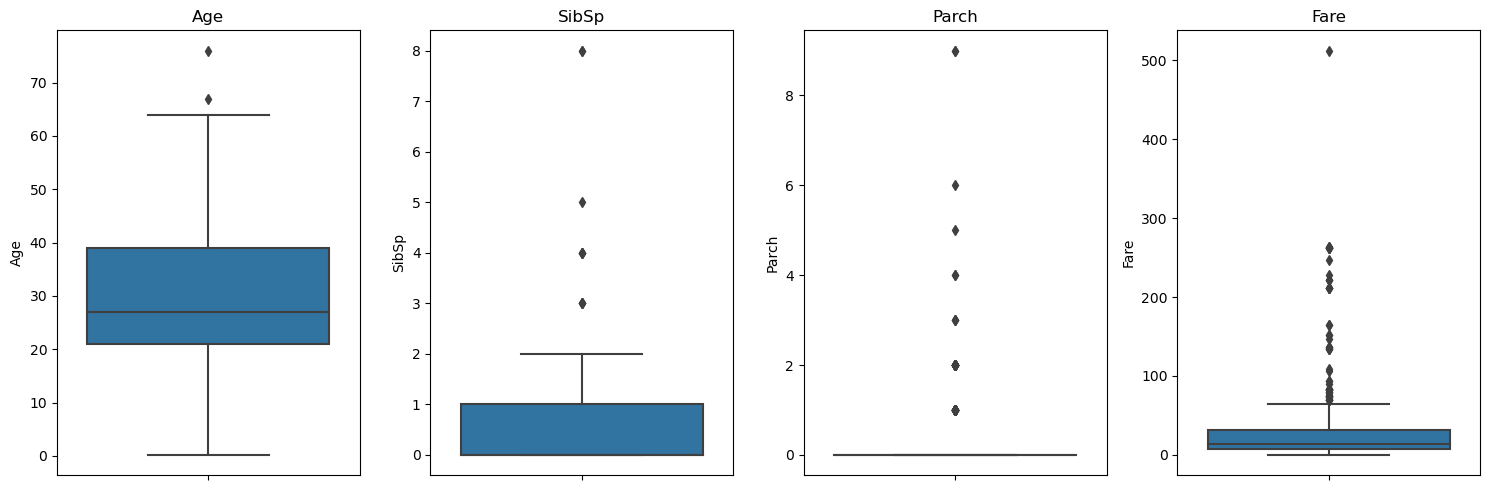

In [429]:
#Define Outliers in Numeric Variables
# Specify the columns you want to plot
columns_to_plot = ['Age', 'SibSp', 'Parch','Fare']

# Create subplots for the boxplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(15, 5))

# Iterate over the columns and plot the boxplots
for i, col in enumerate(columns_to_plot):
    sns.boxplot(y=test_data[col], ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

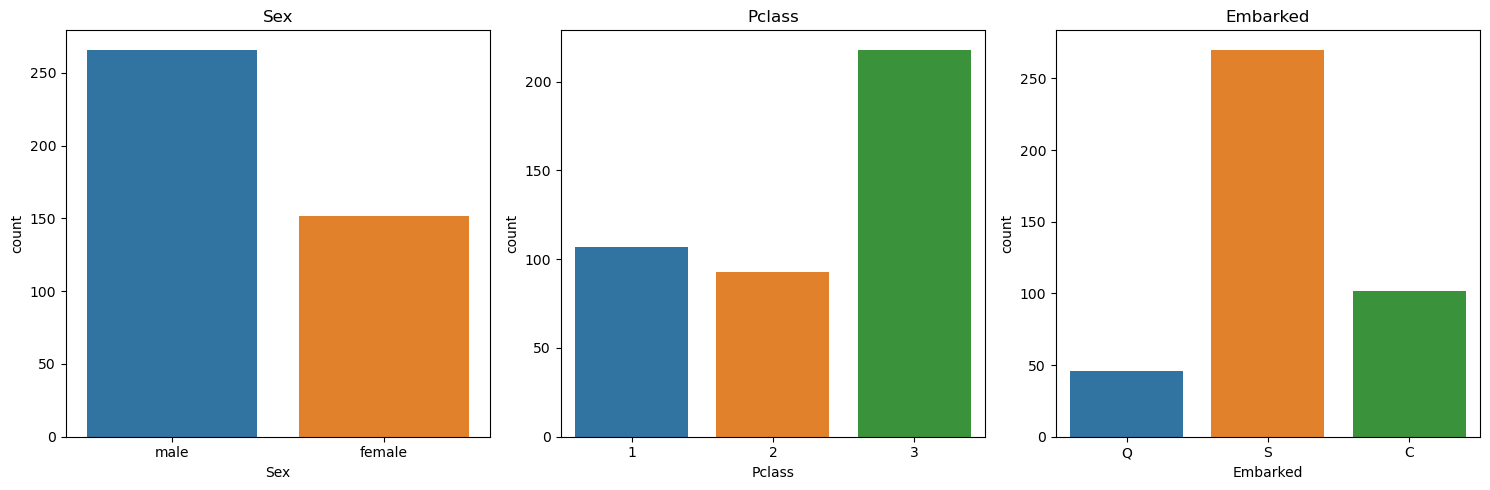

In [430]:
#Define Outliers in Cat Values
# Specify the columns you want to plot
columns_to_plot = ['Sex', 'Pclass', 'Embarked']

# Create subplots for the count plots
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(15, 5))

# Iterate over the columns and plot the count plots
for i, col in enumerate(columns_to_plot):
    sns.countplot(data=test_data, x=col, ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [431]:
#Cleaning Names
test_data.Name.head(10)

0                                Kelly, Mr. James
1                Wilkes, Mrs. James (Ellen Needs)
2                       Myles, Mr. Thomas Francis
3                                Wirz, Mr. Albert
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)
5                      Svensson, Mr. Johan Cervin
6                            Connolly, Miss. Kate
7                    Caldwell, Mr. Albert Francis
8       Abrahim, Mrs. Joseph (Sophie Halaut Easu)
9                         Davies, Mr. John Samuel
Name: Name, dtype: object

In [432]:
# Regex pattern to extract the title
pattern = r', (\w+)\.'

# Apply the regex pattern to the 'Name' column and extract the titles
test_data['Name'] = test_data['Name'].apply(lambda x: re.findall(pattern, x)[0] if re.findall(pattern, x) else ' ')

# Show the count of titles
title_count = test_data['Name'].value_counts()
print(title_count)

Name
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64


In [433]:
# Grouping categories
# Define the categories
categories = {
    'Mr': 'Mr',#Adult male
    'Miss': 'Miss', #Young or unmarried female
    'Ms': 'Miss', #Young or unmarried female
    'Mrs': 'Mrs', #Married female
    'Mme': 'Mrs', #Married female
    'Master': 'Master',#Young boy
    'Dr':  'Dr' #Professional
}

# Function to assign the 'Others' category to unclassified titles
def categorize_title(title):
    if title in categories:
        return categories[title]
    else:
        return 'Especial' #Others

# Apply the function to the 'Name' column to create a new column 'TitleCategory'
test_data['Name'] = test_data['Name'].apply(lambda x: categorize_title(x))

# Show the count of each title category
print(test_data['Name'].value_counts())

Name
Mr          240
Miss         79
Mrs          72
Master       21
Especial      5
Dr            1
Name: count, dtype: int64


#####  Filling Values in Test Data

In [434]:
# Calculate the mean and median of the 'Age' column for each unique value in the 'Name' column
age_stats = test_data.groupby('Name')['Age'].agg(['mean', 'median'])

# Display the age statistics for each unique value in the 'Name' column
print(age_stats)

               mean  median
Name                       
Dr        53.000000    53.0
Especial  42.000000    41.0
Master     7.406471     7.0
Miss      21.774844    22.0
Mr        32.000000    28.5
Mrs       38.903226    36.5


In [435]:
#Calculate the median age for each title in the 'Name' column
median_age_by_title = test_data.groupby('Name')['Age'].median()

# Function to fill missing values in 'Age' with the median age corresponding to the title
def fill_age(row):
    if pd.isnull(row['Age']):
        return median_age_by_title[row['Name']]
    else:
        return row['Age']

# Fill missing values in 'Age' with the median age corresponding to the title
test_data['Age'] = test_data.apply(fill_age, axis=1)

In [436]:
#Calculate the Average Fare for each title in the 'Fare' column
mean_fare_by_title = test_data.groupby('Name')['Fare'].mean()

# Function to fill missing values in 'Age' with the median age corresponding to the title
def fill_fare(row):
    if pd.isnull(row['Fare']):
        return mean_fare_by_title[row['Name']]
    else:
        return row['Fare']

# Fill missing values in 'Fare' with the Average fear corresponding to the title
test_data['Fare'] = test_data.apply(fill_fare, axis=1)

In [437]:
print(test_data.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


## Exploratory Analysis and Visualization¶

In this section, a scatter plot is created to identify the relationship between age and fare concerning the survivors. It is observed that younger individuals had a higher probability of survival, especially children. Regarding adults, there is a tendency to survive if the ticket was more expensive. Additionally, a bar plot is generated based on the title of the name, providing evidence that women, especially young ones, were prioritized in rescue efforts.

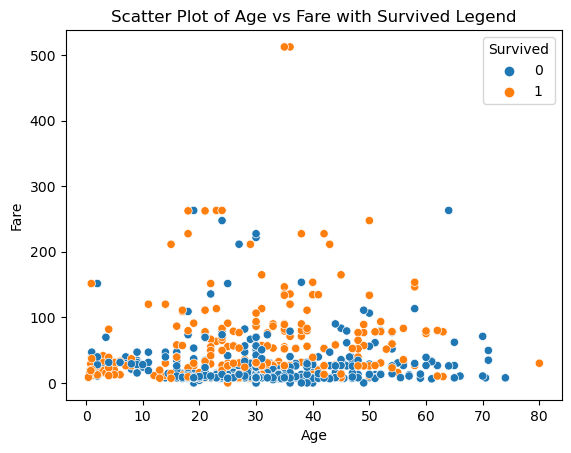

In [438]:

# Create scatter plot with 'Age' and 'Fare', and 'Survived' as legend
sns.scatterplot(data=train_data, x='Age', y='Fare', hue='Survived')

# Set title and labels
plt.title('Scatter Plot of Age vs Fare with Survived Legend')
plt.xlabel('Age')
plt.ylabel('Fare')

# Show legend
plt.legend(title='Survived')

# Show plot
plt.show()


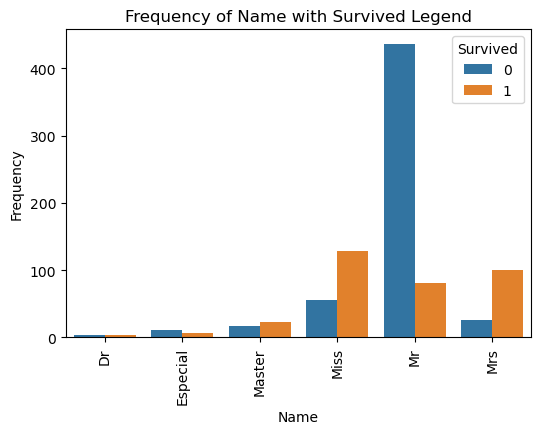

In [439]:
# Calculate the frequency of each name and whether they survived
name_survived_freq = train_data.groupby(['Name', 'Survived']).size().reset_index(name='Frequency')

# Create the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(data=name_survived_freq, x='Name', y='Frequency', hue='Survived')

# Set title and axis labels
plt.title('Frequency of Name with Survived Legend')
plt.xlabel('Name')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the legend
plt.legend(title='Survived')

# Show the plot
plt.show()

##  Feature Engineering

In this section, we perform feature engineering by encoding categorical values such as name and sex. Additionally, we group age and the number of siblings/spouses into bins or groups. Finally, we create a heatmap to visualize the correlation between survival and other factors.

In [440]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr,male,22.0,1,0,7.2500,S
1,1,1,Mrs,female,38.0,1,0,71.2833,C
2,1,3,Miss,female,26.0,0,0,7.9250,S
3,1,1,Mrs,female,35.0,1,0,53.1000,S
4,0,3,Mr,male,35.0,0,0,8.0500,S


In [441]:
# MApping Names and Embarked
# Define the mapping dictionary to assign manually the codes for Name
type_mapping = {'Master': 0, 'Miss': 1,'Mrs': 2,'Dr': 3,'Especial': 4,'Mr': 5}
train_data = pd.concat([train_data, train_data['Name'].map(type_mapping).rename('Name_Encoded')], axis=1)
test_data = pd.concat([test_data, test_data['Name'].map(type_mapping).rename('Name_Encoded')], axis=1)

# Define the mapping dictionary to assign manually the codes for Embarked
type_mapping = {'Q': 0, 'S': 1,'C': 2}
train_data = pd.concat([train_data, train_data['Embarked'].map(type_mapping).rename('Embarked_Encoded')], axis=1)
test_data = pd.concat([test_data, test_data['Embarked'].map(type_mapping).rename('Embarked_Encoded')], axis=1)


#Dropping Name
train_data = train_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)
#Dropping Embarked
train_data = train_data.drop(['Embarked'], axis=1)
test_data = test_data.drop(['Embarked'], axis=1)

In [442]:
# Coding Sex
label_encoder = preprocessing.LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
label_encoder = preprocessing.LabelEncoder()
test_data['Sex'] = label_encoder.fit_transform(test_data['Sex'])


In [443]:
#Grouping Age
def age_bands(data):
    data.loc[ data['Age'] <= 15, 'Age'] = 0.0
    data.loc[(data['Age'] > 15) & (data['Age'] <= 20), 'Age'] = 1
    data.loc[(data['Age'] > 20) & (data['Age'] <= 40), 'Age'] = 2.0
    data.loc[(data['Age'] > 40) & (data['Age'] <= 60), 'Age'] = 3.0
    data.loc[ data['Age'] > 60, 'Age'] = 4.0
    
age_bands(train_data)
age_bands(test_data)

In [444]:
#Grouping SibSp
def Sibsp_bands(data):
    data.loc[ data['SibSp'] <= 1, 'SibSp'] = 0.0
    data.loc[(data['SibSp'] > 1) & (data['SibSp'] <= 2), 'SibSp'] = 1
    data.loc[(data['SibSp'] > 2) & (data['SibSp'] <= 5), 'SibSp'] = 2.0
    data.loc[ data['SibSp'] > 5, 'SibSp'] = 3
    
    
Sibsp_bands(train_data)
Sibsp_bands(test_data)

In [445]:
#Grouping Fare
def Fare_bands(data):
    data.loc[ data['Fare'] <= 8, 'Fare'] = 0.0
    data.loc[(data['Fare'] >8) & (data['Fare'] <= 15), 'Fare'] = 1.0
    data.loc[(data['Fare'] > 15) & (data['Fare'] <= 25), 'Fare'] = 2.0
    data.loc[(data['Fare'] > 25) & (data['Fare'] <= 40), 'Fare'] = 3.0
    data.loc[(data['Fare'] > 40) & (data['Fare'] <= 50), 'Fare'] = 4.0
    data.loc[(data['Fare'] > 50) & (data['Fare'] <= 70), 'Fare'] = 5.0
    data.loc[(data['Fare'] > 70) & (data['Fare'] <= 100), 'Fare'] = 6.0
    data.loc[(data['Fare'] > 100) & (data['Fare'] <= 300), 'Fare'] = 7.0
    data.loc[ data['Fare'] > 300, 'Fare'] = 8
    
    
Fare_bands(train_data)
Fare_bands(test_data)

In [446]:
#Grouping Parch
def Parch_bands(data):
    data.loc[ data['Parch'] <= 1, 'Parch'] = 0.0
    data.loc[(data['Parch'] >1) & (data['Parch'] <= 3), 'Parch'] = 1.0
    data.loc[ data['Parch'] > 3, 'Parch'] = 2
    
    
Parch_bands (train_data)
Parch_bands (test_data)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Name_Encoded,Embarked_Encoded
Survived,1.000000,-0.338481,-0.543351,-0.102013,-0.099021,0.030489,0.329761,-0.526825,0.125953
Pclass,-0.338481,1.000000,0.131900,-0.279917,0.147875,0.032461,-0.739025,0.065089,-0.305762
Sex,-0.543351,0.131900,1.000000,0.095733,-0.061386,-0.198216,-0.242406,0.811690,-0.022521
Age,-0.102013,-0.279917,0.095733,1.000000,-0.319223,-0.183142,0.066618,0.383150,-0.002792
SibSp,-0.099021,0.147875,-0.061386,-0.319223,1.000000,0.330302,0.178427,-0.270910,-0.077368
Parch,0.030489,0.032461,-0.198216,-0.183142,0.330302,1.000000,0.247364,-0.269416,0.007832
Fare,0.329761,-0.739025,-0.242406,0.066618,0.178427,0.247364,1.000000,-0.247813,0.302798
Name_Encoded,-0.526825,0.065089,0.811690,0.383150,-0.270910,-0.269416,-0.247813,1.000000,0.021175
Embarked_Encoded,0.125953,-0.305762,-0.022521,-0.002792,-0.077368,0.007832,0.302798,0.021175,1.000000


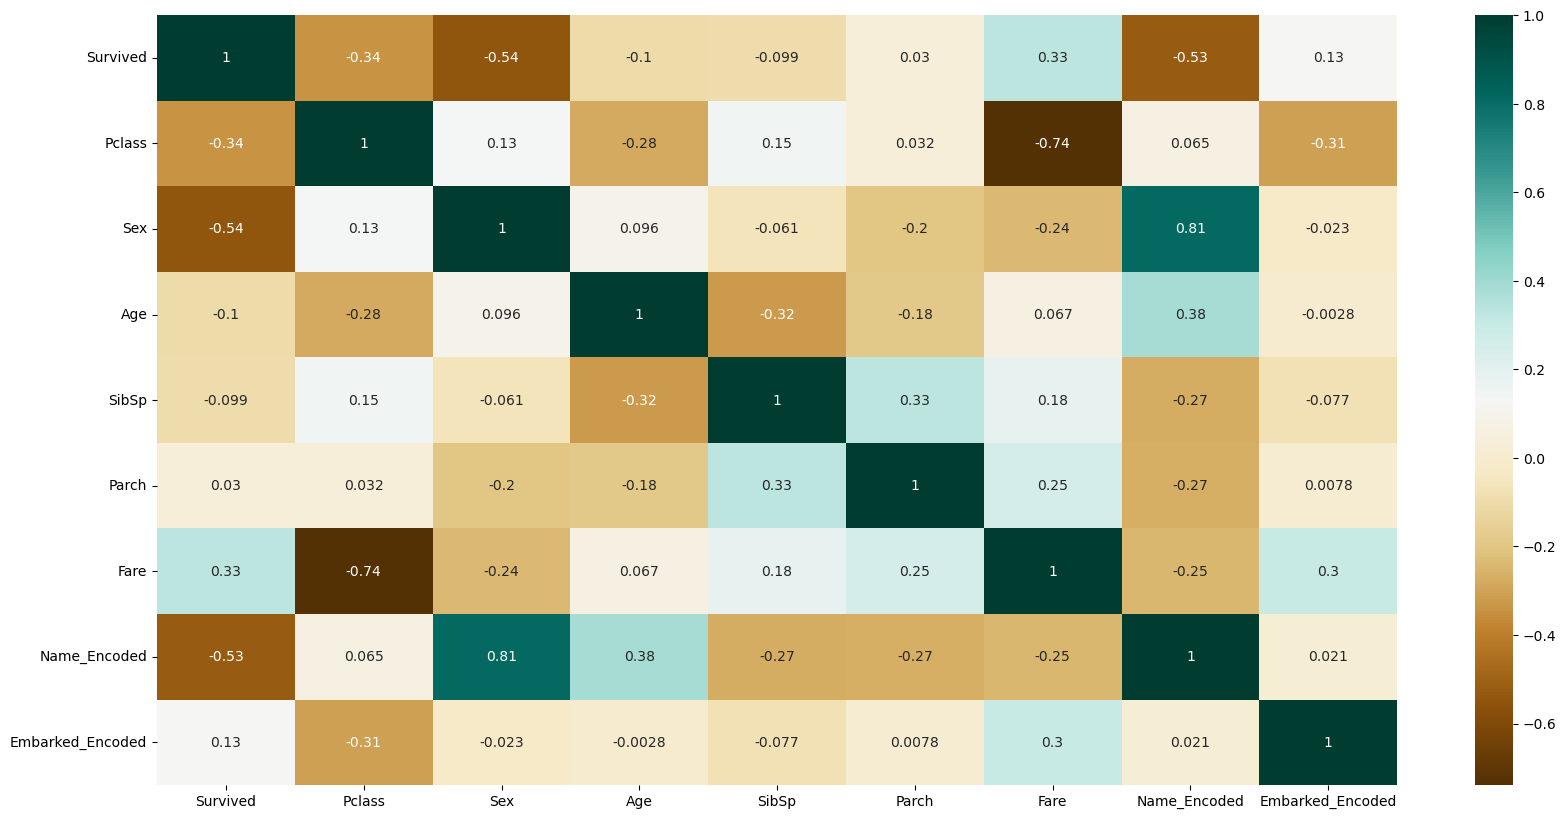

In [447]:
#Creating a Heatmap
plt.figure(figsize=(20,10))
c= train_data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

## Creating Model

In this section, the correlation between the columns and the price is analyzed. Features with higher correlations are selected for the model. The regression is performed using the LinearRegression model from scikit-learn. The coefficient of determination (𝑅2) is calculated to evaluate the model's performance. Additionally, the coefficients and intercept of the model are displayed.

#### Splitting Train Data

In [448]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [449]:
X_train = train_data.drop('Survived', axis=1)
Y_train = train_data.Survived

display(X_train)
display(Y_train)

,Pclass,Sex,Age,SibSp,Parch,Fare,Name_Encoded,Embarked_Encoded
0,3,1,2.0,0,0,0.0,5,1
1,1,0,2.0,0,0,6.0,2,2
2,3,0,2.0,0,0,0.0,1,1
3,1,0,2.0,0,0,5.0,2,1
4,3,1,2.0,0,0,1.0,5,1
...,...,...,...,...,...,...,...,...
886,2,1,2.0,0,0,1.0,4,1
887,1,0,1.0,0,0,3.0,1,1
888,3,0,2.0,0,1,2.0,1,1
889,1,1,2.0,0,0,3.0,5,2


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

####  80% training 20% Test

#### Featuring Scale - Normalization

In [450]:
X_train_norm = pd.DataFrame(preprocessing.normalize(X_train),columns=X_train.columns)



In [451]:
X_train_split, X_test_split, Y_train_split, Y_test_split = train_test_split(X_train_norm, Y_train, test_size=0.20, random_state=42)

In [452]:
X_train_split

,Pclass,Sex,Age,SibSp,Parch,Fare,Name_Encoded,Embarked_Encoded
331,0.147442,0.147442,0.442326,0.000000,0.000000,0.442326,0.737210,0.147442
733,0.333333,0.166667,0.333333,0.000000,0.000000,0.166667,0.833333,0.166667
382,0.474342,0.158114,0.316228,0.000000,0.000000,0.000000,0.790569,0.158114
704,0.474342,0.158114,0.316228,0.000000,0.000000,0.000000,0.790569,0.158114
813,0.600000,0.000000,0.000000,0.400000,0.200000,0.600000,0.200000,0.200000
...,...,...,...,...,...,...,...,...
106,0.774597,0.000000,0.516398,0.000000,0.000000,0.000000,0.258199,0.258199
270,0.156174,0.156174,0.312348,0.000000,0.000000,0.468521,0.780869,0.156174
860,0.437595,0.145865,0.437595,0.145865,0.000000,0.145865,0.729325,0.145865
435,0.137361,0.000000,0.000000,0.000000,0.137361,0.961524,0.137361,0.137361


In [453]:
X_test_split

,Pclass,Sex,Age,SibSp,Parch,Fare,Name_Encoded,Embarked_Encoded
709,0.707107,0.235702,0.000000,0.0,0.000000,0.471405,0.000000,0.471405
439,0.333333,0.166667,0.333333,0.0,0.000000,0.166667,0.833333,0.166667
840,0.493197,0.164399,0.164399,0.0,0.000000,0.000000,0.821995,0.164399
720,0.516398,0.000000,0.000000,0.0,0.000000,0.774597,0.258199,0.258199
39,0.774597,0.000000,0.000000,0.0,0.000000,0.258199,0.258199,0.516398
...,...,...,...,...,...,...,...,...
433,0.493197,0.164399,0.164399,0.0,0.000000,0.000000,0.821995,0.164399
773,0.457496,0.152499,0.304997,0.0,0.000000,0.000000,0.762493,0.304997
25,0.538816,0.000000,0.359211,0.0,0.359211,0.538816,0.359211,0.179605
84,0.707107,0.000000,0.353553,0.0,0.000000,0.353553,0.353553,0.353553


In [454]:
Y_train_split

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [455]:
Y_test_split

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

### KNN - Model

In [456]:
# Selecting the best K value trough a Cross- Validation evaluation
cv_scores_accuracy = []
k_values = range(1, 21)

In [457]:
# Evaluating Accuracy Scores
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_split, Y_train_split, cv=5, scoring='accuracy')
    cv_scores_accuracy.append(scores.mean()) 

In [458]:
for k, accuracy_scores_mean in zip(k_values, cv_scores_accuracy):
    print(f"K = {k}, accuracy Score: {accuracy_scores_mean}")

K = 1, accuracy Score: 0.740027578055747
K = 2, accuracy Score: 0.779424800551561
K = 3, accuracy Score: 0.8047769132276177
K = 4, accuracy Score: 0.7935093075938147
K = 5, accuracy Score: 0.8174037230375258
K = 6, accuracy Score: 0.8033093666896484
K = 7, accuracy Score: 0.8173840244262779
K = 8, accuracy Score: 0.8131783709248499
K = 9, accuracy Score: 0.825824879346006
K = 10, accuracy Score: 0.8187924751305033
K = 11, accuracy Score: 0.8272333300502315
K = 12, accuracy Score: 0.8230276765488034
K = 13, accuracy Score: 0.8145769723234512
K = 14, accuracy Score: 0.8117502216093765
K = 15, accuracy Score: 0.81312912439673
K = 16, accuracy Score: 0.8117305229981285
K = 17, accuracy Score: 0.8075051708854526
K = 18, accuracy Score: 0.8089234708953018
K = 19, accuracy Score: 0.8173643258150299
K = 20, accuracy Score: 0.8159361764995567


In [459]:
optimal_k_accuracy = k_values[np.argmax(cv_scores_accuracy)]
print("Optimal value of k:", optimal_k_accuracy)

Optimal value of k: 11


In [460]:
#Trainning the model
best_knn = KNeighborsClassifier(n_neighbors=optimal_k_accuracy)
best_knn.fit(X_train_split, Y_train_split)

KNeighborsClassifier(n_neighbors=11)

In [461]:
y_pred = best_knn.predict(X_test_split)
y_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [462]:
# Calculating Accuaacy, Recall and Precision

accuracy = accuracy_score(Y_test_split, y_pred)
recall = recall_score(Y_test_split, y_pred, average='weighted')
precision = precision_score(Y_test_split, y_pred, average='weighted')
f1 = f1_score(Y_test_split, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("f1_score:", f1)

Accuracy: 0.8379888268156425
Recall: 0.8379888268156425
Precision: 0.8383541039965622
f1_score: 0.838144901931905


In [463]:
print("Length of Y_test_split:", len(Y_test_split))
print("Length of y_pred:", len(y_pred))

Length of Y_test_split: 179
Length of y_pred: 179


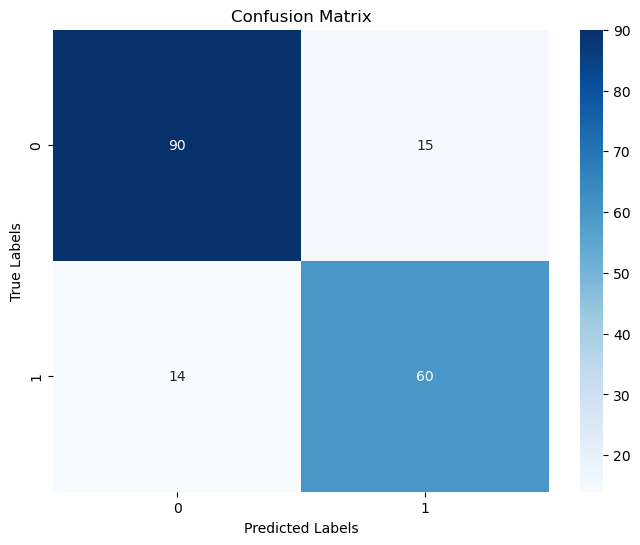

In [464]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test_split, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### ANN Model

In [465]:
!pip install tensorflow
!pip install pydot


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [466]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, Input
from keras import callbacks

In [467]:
# Build a simple neural network
model = Sequential()
# Define the input shape with Input layer
model.add(Input(shape=(8,)))
# Add other layers
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='relu'))

In [468]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
history = model.fit(X_train_split, Y_train_split, epochs=100, batch_size=8, verbose=1,validation_data=(X_test_split,Y_test_split))




Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6485 - loss: 5.6607 - val_accuracy: 0.5866 - val_loss: 6.5980
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6339 - loss: 5.8769 - val_accuracy: 0.5866 - val_loss: 6.5924
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6038 - loss: 5.0092 - val_accuracy: 0.5866 - val_loss: 1.3898
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6414 - loss: 0.9697 - val_accuracy: 0.5866 - val_loss: 0.8011
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5993 - loss: 0.7794 - val_accuracy: 0.5866 - val_loss: 0.7070
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6156 - loss: 0.6863 - val_accuracy: 0.5866 - val_loss: 0.6594
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6219 - loss: 0.6395 - val_accuracy: 0.5866 - val_loss: 0.6268
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6519 - loss: 0.6083 - val_accuracy: 0.7151 - v

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7925 - loss: 0.4564 - val_accuracy: 0.7821 - val_loss: 0.4237
Epoch 52/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8077 - loss: 0.4042 - val_accuracy: 0.7765 - val_loss: 0.4206
Epoch 53/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7978 - loss: 0.4235 - val_accuracy: 0.7821 - val_loss: 0.4230
Epoch 54/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8076 - loss: 0.4196 - val_accuracy: 0.7654 - val_loss: 0.4186
Epoch 55/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8234 - loss: 0.4173 - val_accuracy: 0.7598 - val_loss: 0.4195
Epoch 56/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7967 - loss: 0.4172 - val_accuracy: 0.7709 - val_loss: 0.4215
Epoch 57/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8248 - loss: 0.4139 - val_accuracy: 0.8045 - val_loss: 0.4267
Epoch 58/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7875 - loss: 0.4415 - val_accuracy: 0.8101 - val_lo

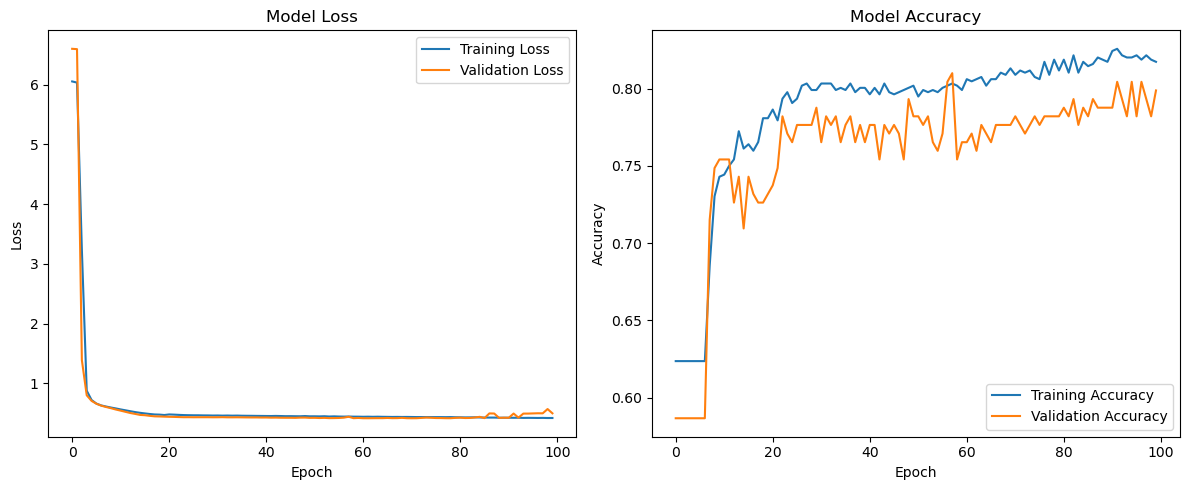

In [469]:
# Plotting the loss and accuracy
plt.figure(figsize=(12, 5))

# Plotting loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


In [470]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 461 (1.80 KB)

 Trainable params: 153 (612.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 308 (1.21 KB)

In [471]:
#Prediction on Testing_Split Data
y_pred = model.predict(X_test_split)
y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[1.2265208 ],
       [0.10487857],
       [0.11523271],
       [1.0774117 ],
       [0.74665356],
       [1.2485894 ],
       [0.6803444 ],
       [0.10033108],
       [0.45851856],
       [0.8742517 ],
       [0.29503912],
       [0.11501185],
       [0.43029898],
       [0.11183466],
       [0.10487857],
       [1.1946466 ],
       [0.33007264],
       [0.6803444 ],
       [0.105216  ],
       [0.33007264],
       [0.11842351],
       [0.23339915],
       [0.50605875],
       [0.10558166],
       [0.10904729],
       [0.1986486 ],
       [0.49331158],
       [0.10487857],
       [0.1986486 ],
       [0.6102452 ],
       [0.11523271],
       [0.61024517],
       [0.35444683],
       [0.6102452 ],
       [0.10558166],
       [0.10703455],
       [0.23339915],
       [0.6803444 ],
       [1.3267996 ],
       [0.11842351],
       [0.14727212],
       [0.11842351],
       [0.10904729],
       [0.13067216],
       [0.6517087 ],
       [0.15597028],
       [0.10558166],
       [0.109

In [472]:
#Checking Accuracy
loss, accuracy = model.evaluate(X_test_split, Y_test_split)
print(f'Test Accuracy: {accuracy:.2f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8142 - loss: 0.4372 
Test Accuracy: 0.80


In [473]:
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels

In [474]:
print("Length of Y_test_split:", len(Y_test_split))
print("Length of y_pred:", len(y_pred))

Length of Y_test_split: 179
Length of y_pred: 179


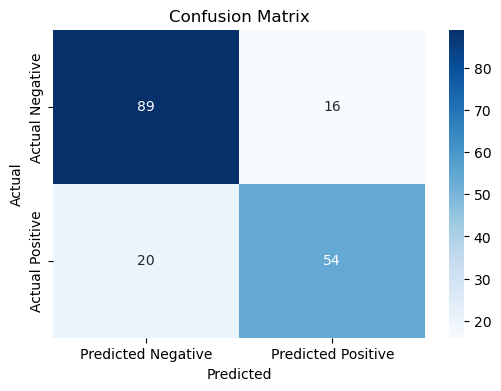

In [475]:
cm2 = confusion_matrix(Y_test_split, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Preparing Submission

In [476]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Name_Encoded,Embarked_Encoded
0,892,3,1,2.0,0,0,0.0,5,0
1,893,3,0,3.0,0,0,0.0,2,1
2,894,2,1,4.0,0,0,1.0,5,0
3,895,3,1,2.0,0,0,1.0,5,1
4,896,3,0,2.0,0,0,1.0,2,1


In [477]:
test_model = test_data.drop("PassengerId", axis=1)

In [478]:
#Scaling the data

X_test = pd.DataFrame(preprocessing.normalize(test_model),columns=test_model.columns)
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Name_Encoded,Embarked_Encoded
0,0.480384,0.160128,0.320256,0.0,0.0,0.000000,0.800641,0.000000
1,0.625543,0.000000,0.625543,0.0,0.0,0.000000,0.417029,0.208514
2,0.291730,0.145865,0.583460,0.0,0.0,0.145865,0.729325,0.000000
3,0.468521,0.156174,0.312348,0.0,0.0,0.156174,0.780869,0.156174
4,0.688247,0.000000,0.458831,0.0,0.0,0.229416,0.458831,0.229416


In [479]:
#Predicting with KNN 

y_pred = best_knn.predict(X_test)
y_pred


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [480]:
y_pred = y_pred.astype(int)
test_data ['Survived'] = y_pred

In [481]:
test_data = test_data[['PassengerId', 'Survived']]
test_data

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [482]:
test_data.to_csv("submission.csv", header=test_data.columns, index=False)

## Summary and Insights

The dataset used in this analysis did not have complete information regarding the passengers' cabin assignments, so this feature was excluded from the model. Additionally, the ID and Ticket data were not considered relevant, as no discernible patterns were identified that would contribute meaningfully to the model's predictions.

The numerical variables in the dataset generally contained consistent information, with the exception of the Age variable, which required correction.

#### Data Preprocessing
Name Cleaning: The names were cleaned to extract the title of each passenger. This extraction was instrumental in imputing missing age values and enhancing the model's training process.

Imputing Missing Values:

 * Age: Missing ages were imputed using the median age of the group corresponding to each passenger's title.
 * Fare: Missing fare values were filled using the median fare.
 * Embarked: Missing embarked values were filled using the mode.
#### Exploratory Data Analysis
Visualizations revealed that passengers who purchased more expensive tickets tended to have a higher survival rate. However, the most significant predictors of survival were the passenger's title and sex, with women and children having higher survival priority.

Variables such as the number of siblings/spouses and the number of guests showed no significant correlation with survival probability.

#### Model Selection and Evaluation
##### K-Nearest Neighbors (KNN) Model:

* The optimal number of neighbors was determined through cross-validation, focusing on accuracy.
* The model achieved an accuracy of 0.84. Out of a test sample of 179, the model made 150 correct predictions and 29 incorrect predictions.
* Given its high accuracy, this model was chosen for submission.
##### Artificial Neural Network (ANN) Model:

 * The performance of the ANN model varied significantly based on the layer configuration. A trial-and-error approach was used to determine the best configuration.
 * The current configuration of the ANN model achieved an accuracy of 0.80, correctly predicting 143 out of the same sample of 179, resulting in 36 incorrect predictions.

# If you have come this far, give it a thumbs up :) 
## Thanks for watching